In [1]:
from IPython.display import Image
from matplotlib import pyplot as plt

import cv2
import argparse
import sys
import numpy as np
import pandas as pd
import os.path
import random
# from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
# from keras.models import Model, Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam

In [2]:
input_path = './data/PersianPlate.jpg'

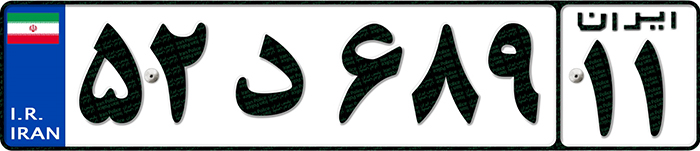

In [3]:
Image(input_path)

In [4]:
cap = cv2.imread(input_path)


In [5]:
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4  #Non-maximum suppression threshold

inpWidth = 474     #Width of network's input image
inpHeight = 242     #Height of network's input image


In [6]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            plt.title('Predict Segments')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [7]:
def segment_characters(image) :
    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Contour')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

In [8]:
nparray = np.array(cap)

# gray = cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)

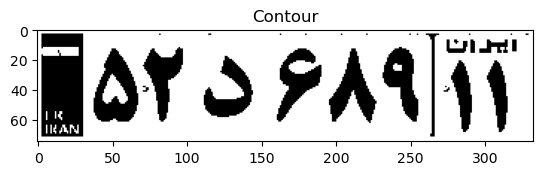

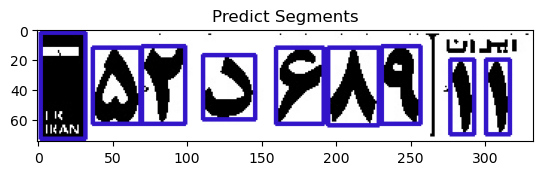

In [9]:
char=segment_characters(image=cap)

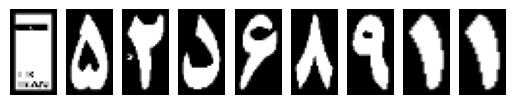

In [10]:
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
plt.show()

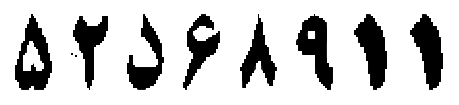

In [11]:
for i in range(len(char)):
    if i == 0 :
        pass
    else:
        plt.subplot(1, len(char), i+1)
        invert = cv2.bitwise_not(char[i]) # OR
        invert = 255 - invert
        plt.imshow(invert , cmap='gray')
        plt.axis('off')
plt.show()

In [12]:
class_id = []
img_path = []
for index , foldername in enumerate(os.listdir("C:/Users/hosei/Documents/GIT/data/Iranis Dataset Files/")):
    for inner_index , filename in enumerate(os.listdir("C:/Users/hosei/Documents/GIT/data/Iranis Dataset Files/"+foldername)):
        class_id.append(foldername)
        img_path.append(filename)

In [13]:
for i in range(len(class_id)):
    print(f'class id = {class_id[i]} , file_name = {img_path[i]}' )

class id = 0 , file_name = 0 (1).jpg
class id = 0 , file_name = 0 (10).jpg
class id = 0 , file_name = 0 (100).jpg
class id = 0 , file_name = 0 (1000).jpg
class id = 0 , file_name = 0 (1001).jpg
class id = 0 , file_name = 0 (1002).jpg
class id = 0 , file_name = 0 (1003).jpg
class id = 0 , file_name = 0 (1004).jpg
class id = 0 , file_name = 0 (1005).jpg
class id = 0 , file_name = 0 (1006).jpg
class id = 0 , file_name = 0 (1007).jpg
class id = 0 , file_name = 0 (1008).jpg
class id = 0 , file_name = 0 (1009).jpg
class id = 0 , file_name = 0 (101).jpg
class id = 0 , file_name = 0 (1010).jpg
class id = 0 , file_name = 0 (1011).jpg
class id = 0 , file_name = 0 (1012).jpg
class id = 0 , file_name = 0 (1013).jpg
class id = 0 , file_name = 0 (1014).jpg
class id = 0 , file_name = 0 (1015).jpg
class id = 0 , file_name = 0 (1016).jpg
class id = 0 , file_name = 0 (1017).jpg
class id = 0 , file_name = 0 (1018).jpg
class id = 0 , file_name = 0 (1019).jpg
class id = 0 , file_name = 0 (102).jpg
class id

In [14]:
paths_data = zip(class_id , img_path)
paths_data = list(paths_data)
len(paths_data)

83844

In [15]:
import csv
with open('./CSV/meta.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    output = list(reader)

In [16]:
meta_list = output

In [17]:
path_df = pd.DataFrame(paths_data)

In [18]:
path_df.head()

0             1
0  0     0 (1).jpg
1  0    0 (10).jpg
2  0   0 (100).jpg
3  0  0 (1000).jpg
4  0  0 (1001).jpg

In [19]:
meta = {'0':0,
'1':1,
'2':2,
'3':3,
'4':4,
'5':5,
'6':6,
'7':7,
'8':8,
'9':9,
'A':10,
'B':11,
'P':12,
'Gh':13,
'H':14,
'J':15,
'L':16,
'M':17,
'N':18,
'P':19,
'PuV':20,
'PwD':21,
'Sad':22,
'Sin':23,
'T':24,
'Taxi':25,
'V':26,
'Y':27,
'D':28}

In [20]:
list_index = []
list_filename = []
for index, row in path_df.iterrows():
    print(row[0])
    print(row[1])
    print("\n")
    row[0] = meta[row[0]]
    

0
0 (1).jpg


0
0 (10).jpg


0
0 (100).jpg


0
0 (1000).jpg


0
0 (1001).jpg


0
0 (1002).jpg


0
0 (1003).jpg


0
0 (1004).jpg


0
0 (1005).jpg


0
0 (1006).jpg


0
0 (1007).jpg


0
0 (1008).jpg


0
0 (1009).jpg


0
0 (101).jpg


0
0 (1010).jpg


0
0 (1011).jpg


0
0 (1012).jpg


0
0 (1013).jpg


0
0 (1014).jpg


0
0 (1015).jpg


0
0 (1016).jpg


0
0 (1017).jpg


0
0 (1018).jpg


0
0 (1019).jpg


0
0 (102).jpg


0
0 (1020).jpg


0
0 (1021).jpg


0
0 (1022).jpg


0
0 (1023).jpg


0
0 (1024).jpg


0
0 (1025).jpg


0
0 (1026).jpg


0
0 (1027).jpg


0
0 (1028).jpg


0
0 (1029).jpg


0
0 (103).jpg


0
0 (1030).jpg


0
0 (1031).jpg


0
0 (1032).jpg


0
0 (1033).jpg


0
0 (1034).jpg


0
0 (1035).jpg


0
0 (1036).jpg


0
0 (1037).jpg


0
0 (1038).jpg


0
0 (1039).jpg


0
0 (104).jpg


0
0 (1040).jpg


0
0 (1041).jpg


0
0 (1042).jpg


0
0 (1043).jpg


0
0 (1044).jpg


0
0 (1045).jpg


0
0 (1046).jpg


0
0 (1047).jpg


0
0 (1048).jpg


0
0 (1049).jpg


0
0 (105).jpg


0
0 (1050).jpg


0
0 (105

In [21]:
path_df_record = path_df.to_records()
path_df_record.tolist()
path_df_record = list(path_df_record)

In [22]:
path_df_record

[(0, 0, '0 (1).jpg'),
 (1, 0, '0 (10).jpg'),
 (2, 0, '0 (100).jpg'),
 (3, 0, '0 (1000).jpg'),
 (4, 0, '0 (1001).jpg'),
 (5, 0, '0 (1002).jpg'),
 (6, 0, '0 (1003).jpg'),
 (7, 0, '0 (1004).jpg'),
 (8, 0, '0 (1005).jpg'),
 (9, 0, '0 (1006).jpg'),
 (10, 0, '0 (1007).jpg'),
 (11, 0, '0 (1008).jpg'),
 (12, 0, '0 (1009).jpg'),
 (13, 0, '0 (101).jpg'),
 (14, 0, '0 (1010).jpg'),
 (15, 0, '0 (1011).jpg'),
 (16, 0, '0 (1012).jpg'),
 (17, 0, '0 (1013).jpg'),
 (18, 0, '0 (1014).jpg'),
 (19, 0, '0 (1015).jpg'),
 (20, 0, '0 (1016).jpg'),
 (21, 0, '0 (1017).jpg'),
 (22, 0, '0 (1018).jpg'),
 (23, 0, '0 (1019).jpg'),
 (24, 0, '0 (102).jpg'),
 (25, 0, '0 (1020).jpg'),
 (26, 0, '0 (1021).jpg'),
 (27, 0, '0 (1022).jpg'),
 (28, 0, '0 (1023).jpg'),
 (29, 0, '0 (1024).jpg'),
 (30, 0, '0 (1025).jpg'),
 (31, 0, '0 (1026).jpg'),
 (32, 0, '0 (1027).jpg'),
 (33, 0, '0 (1028).jpg'),
 (34, 0, '0 (1029).jpg'),
 (35, 0, '0 (103).jpg'),
 (36, 0, '0 (1030).jpg'),
 (37, 0, '0 (1031).jpg'),
 (38, 0, '0 (1032).jpg'),
 (39,

In [23]:
int(len(path_df)/5) #train / test split

16768

In [24]:
from tqdm import tqdm


In [25]:
test_split_data = []
for i in tqdm(range(500)):
    random_sample = random.choice(path_df_record)
    path_df_record.remove(random_sample)
    test_split_data.append(random_sample)
    

100%|██████████| 500/500 [01:55<00:00,  4.32it/s]


In [34]:
len(test_split_data) + len(path_df_record)

83844

In [27]:
test_split_data

[(69676, 22, 'Sad (1769).jpg'),
 (54952, 16, 'L (2097).jpg'),
 (41638, 11, 'B (1418).jpg'),
 (81714, 27, 'Y (1323).jpg'),
 (67441, 21, 'PwD (2008).jpg'),
 (44688, 28, 'D (1903).jpg'),
 (18775, 5, '5 (1296).jpg'),
 (36480, 9, '9 (2216).jpg'),
 (76609, 25, 'Taxi (1283).jpg'),
 (66175, 20, 'PuV (87).jpg'),
 (34188, 8, '8 (3379).jpg'),
 (28464, 7, '7 (159).jpg'),
 (4354, 1, '1 (2667).jpg'),
 (13696, 4, '4 (1921).jpg'),
 (3530, 1, '1 (1925).jpg'),
 (41170, 10, 'A (998).jpg'),
 (76332, 25, 'Taxi (1033).jpg'),
 (16750, 4, '4 (4670).jpg'),
 (70167, 22, 'Sad (221).jpg'),
 (56294, 17, 'M (1052).jpg'),
 (81515, 27, 'Y (1144).jpg'),
 (22166, 6, '6 (1099).jpg'),
 (12901, 4, '4 (1205).jpg'),
 (13384, 4, '4 (1640).jpg'),
 (41210, 11, 'B (1032).jpg'),
 (19050, 5, '5 (1543).jpg'),
 (12593, 3, '3 (929).jpg'),
 (82160, 27, 'Y (1725).jpg'),
 (68090, 21, 'PwD (340).jpg'),
 (14122, 4, '4 (2304).jpg'),
 (47995, 13, 'Gh (392).jpg'),
 (34991, 8, '8 (877).jpg'),
 (19685, 5, '5 (2114).jpg'),
 (53285, 15, 'J (597

In [35]:
train_split_data = path_df_record

In [36]:
train_csv = "./CSV/Plate_train.csv"
test_csv = "./CSV/Plate_test.csv"

In [37]:
import csv

In [38]:
path_df_record

[(0, 0, '0 (1).jpg'),
 (1, 0, '0 (10).jpg'),
 (2, 0, '0 (100).jpg'),
 (3, 0, '0 (1000).jpg'),
 (4, 0, '0 (1001).jpg'),
 (5, 0, '0 (1002).jpg'),
 (6, 0, '0 (1003).jpg'),
 (7, 0, '0 (1004).jpg'),
 (8, 0, '0 (1005).jpg'),
 (9, 0, '0 (1006).jpg'),
 (10, 0, '0 (1007).jpg'),
 (11, 0, '0 (1008).jpg'),
 (12, 0, '0 (1009).jpg'),
 (13, 0, '0 (101).jpg'),
 (14, 0, '0 (1010).jpg'),
 (15, 0, '0 (1011).jpg'),
 (16, 0, '0 (1012).jpg'),
 (17, 0, '0 (1013).jpg'),
 (18, 0, '0 (1014).jpg'),
 (19, 0, '0 (1015).jpg'),
 (20, 0, '0 (1016).jpg'),
 (21, 0, '0 (1017).jpg'),
 (22, 0, '0 (1018).jpg'),
 (23, 0, '0 (1019).jpg'),
 (24, 0, '0 (102).jpg'),
 (25, 0, '0 (1020).jpg'),
 (26, 0, '0 (1021).jpg'),
 (27, 0, '0 (1022).jpg'),
 (28, 0, '0 (1023).jpg'),
 (29, 0, '0 (1024).jpg'),
 (30, 0, '0 (1025).jpg'),
 (31, 0, '0 (1026).jpg'),
 (32, 0, '0 (1027).jpg'),
 (33, 0, '0 (1028).jpg'),
 (34, 0, '0 (1029).jpg'),
 (35, 0, '0 (103).jpg'),
 (36, 0, '0 (1030).jpg'),
 (37, 0, '0 (1031).jpg'),
 (38, 0, '0 (1032).jpg'),
 (39,

In [39]:
test_split_data

[(69676, 22, 'Sad (1769).jpg'),
 (54952, 16, 'L (2097).jpg'),
 (41638, 11, 'B (1418).jpg'),
 (81714, 27, 'Y (1323).jpg'),
 (67441, 21, 'PwD (2008).jpg'),
 (44688, 28, 'D (1903).jpg'),
 (18775, 5, '5 (1296).jpg'),
 (36480, 9, '9 (2216).jpg'),
 (76609, 25, 'Taxi (1283).jpg'),
 (66175, 20, 'PuV (87).jpg'),
 (34188, 8, '8 (3379).jpg'),
 (28464, 7, '7 (159).jpg'),
 (4354, 1, '1 (2667).jpg'),
 (13696, 4, '4 (1921).jpg'),
 (3530, 1, '1 (1925).jpg'),
 (41170, 10, 'A (998).jpg'),
 (76332, 25, 'Taxi (1033).jpg'),
 (16750, 4, '4 (4670).jpg'),
 (70167, 22, 'Sad (221).jpg'),
 (56294, 17, 'M (1052).jpg'),
 (81515, 27, 'Y (1144).jpg'),
 (22166, 6, '6 (1099).jpg'),
 (12901, 4, '4 (1205).jpg'),
 (13384, 4, '4 (1640).jpg'),
 (41210, 11, 'B (1032).jpg'),
 (19050, 5, '5 (1543).jpg'),
 (12593, 3, '3 (929).jpg'),
 (82160, 27, 'Y (1725).jpg'),
 (68090, 21, 'PwD (340).jpg'),
 (14122, 4, '4 (2304).jpg'),
 (47995, 13, 'Gh (392).jpg'),
 (34991, 8, '8 (877).jpg'),
 (19685, 5, '5 (2114).jpg'),
 (53285, 15, 'J (597

In [40]:
tr_csv = pd.DataFrame(test_split_data)

In [41]:
with open (train_csv ,mode='w' , newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    table = ["index ","class_id" , "path"]
    csvwriter.writerow(table)
    csvwriter.writerows(train_split_data)

In [42]:
with open (test_csv ,mode='w' , newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    table = ["index ", "class_id" , "path"]
    csvwriter.writerow(table)
    csvwriter.writerows(test_split_data)

In [43]:
# import shutil

# main_path = "C:/Users/hosei/Documents/GIT/data/Iranis Dataset Files/"
# paste_path = "C:/Users/hosei/Documents/GIT/data/All_characters/"


# for index , foldername in enumerate(os.listdir(main_path)):
#     copy_source_path = main_path+foldername+"/"
#     for image in os.listdir(copy_source_path):
#         shutil.copyfile(copy_source_path + image, paste_path + image)

In [44]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [45]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
device = torch.device('cpu')

In [58]:
device

device(type='cpu')

In [82]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor() , torchvision.transforms.Resize((64,64))])

class Character_dataset(Dataset):
    def __init__(self, df, root_dir,transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,index):
        image_path = os.path.join(self.root_dir,self.df.iloc[index,2])  #the column of paths in dataframe is 1
        image = Image.open(image_path)
        y_class = torch.tensor(self.df.iloc[index, 1]) #the column of ClsassId in daraframe is 0
        
        if self.transform:
            image = self.transform(image)
            return (image, y_class)

In [83]:
train_df.iloc[:,1]

0         0
1         0
2         0
3         0
4         0
         ..
83339    27
83340    27
83341    27
83342    27
83343    27
Name: class_id, Length: 83344, dtype: int64

In [84]:
num_epochs = 3
batch_size = 32
learning_rate = 0.001

In [85]:
training_set = Character_dataset(train_df,"C:/Users/hosei/Documents/GIT/data/ALL_characters",transform=transforms)
test_set = Character_dataset(test_df,"C:/Users/hosei/Documents/GIT/data/ALL_characters",transform=transforms)

In [86]:
train_loader = DataLoader(dataset = training_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_set, batch_size=batch_size, shuffle=False)

dataloaders = {'training':train_loader,'testing':test_loader}
dataset_sizes = {'training':len(train_loader.dataset),'testing':len(test_loader.dataset)}
print(dataset_sizes)

{'training': 83344, 'testing': 500}


In [87]:
class CHR_Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(CHR_Model, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.relu = nn.LeakyReLU()
        self.flatten = nn.Flatten()

        self.dropout2 = nn.Dropout(0.2)
        self.dropout3 = nn.Dropout(0.3)
        self.maxpool = nn.MaxPool2d(kernel_size=4)
        
        self.conv1 = nn.Conv2d(in_channels=3 , out_channels=32 , kernel_size=3 , padding=1)
        self.conv2 = nn.Conv2d(in_channels=32 , out_channels=64 , kernel_size=3 , padding=1)
        self.batchnorm1 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64 , out_channels=128 , kernel_size=3 , padding=1)
        self.conv4 = nn.Conv2d(in_channels=128 , out_channels=256 , kernel_size=3 , padding=1)
        self.batchnorm2 = nn.BatchNorm2d(256)
        
        # self.conv5 = nn.Conv2d(in_channels=256 , out_channels=512 , kernel_size=3 , padding=1)
        # self.conv6 = nn.Conv2d(in_channels=512 , out_channels=1028 , kernel_size=3 , padding=1)
        # self.batchnorm3 = nn.BatchNorm2d(1028)
        
        self.l1 = nn.Linear(4096,2048)
        self.l2 = nn.Linear(2048,1024)
        self.batchnorm4 = nn.LayerNorm(1024)
        # self.l3 = nn.Linear(4096,1024)
        # self.l4 = nn.Linear(1024,128)
        # self.batchnorm5 = nn.LayerNorm(128)
        self.l5 = nn.Linear(1024,output_size)
        
    def forward(self, input):
        
        conv1 = self.conv1(input)
        conv2 = self.conv2(conv1)
        batchnorm = self.batchnorm1(conv2)
        relu = self.relu(batchnorm)
        maxpool = self.maxpool(relu)
        
        conv3 = self.conv3(maxpool)
        conv4 = self.conv4(conv3)
        batchnorm = self.batchnorm2(conv4)
        relu = self.relu(batchnorm)
        maxpool = self.maxpool(relu)
        
        # conv5 = self.conv5(maxpool)
        # conv6 = self.conv6(conv5)
        # batchnorm = self.batchnorm2(conv6)
        # relu = self.relu(batchnorm)
        # maxpool = self.maxpool(relu)
        
        flatten = self.flatten(maxpool)
        
        #Neural Network Featuremap input
        dense_l1 = self.l1(flatten)
        dropout = self.dropout3(dense_l1)
        dense_l2 = self.l2(dropout)
        batchnorm = self.batchnorm4(dense_l2)
        dropout = self.dropout2(batchnorm)
        
        relu = self.relu(dropout)
        
        # dense_l3 = self.l3(relu)
        # dropout = self.dropout3(dense_l3)
        
        # relu = self.relu(dropout)
        
        # dense_l4 = self.l4(relu)
        # batchnorm = self.batchnorm5(dense_l4)
        dropout = self.dropout2(batchnorm)
        
        output = self.l5(dropout)
        
        return output

In [88]:
input_size = 3*64*64
output_size = 28
model = CHR_Model(input_size=input_size, output_size=output_size)

In [89]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # images, labels = images.type(torch.LongTensor), labels.type(torch.LongTensor)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}, loss = {loss.item()}')

    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images, labels = images.type(torch.FloatTensor), labels.type(torch.FloatTensor)
            labels = labels.to(device)
            outputs = model(images)

            _, predictions = torch.max(outputs, 1)
            n_samples +=labels.shape[0]
            n_correct +=(predictions == labels).sum().item()
        acc = 100.0 * (n_correct / n_samples)
        print(f'epoch {epoch+1} / 10, accuracy = {acc}')

c:\Users\hosei\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


IndexError: Target 28 is out of bounds.